In [1]:
%run _setup.py

2026-02-07 17:21:35,055 | INFO | __main__ | Project root detected at: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python
2026-02-07 17:21:35,059 | INFO | __main__ | SRC path detected at: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\src
2026-02-07 17:21:35,062 | INFO | __main__ | Added to PYTHONPATH: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\src
2026-02-07 17:21:35,064 | INFO | __main__ | Added to PYTHONPATH: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\src\config
2026-02-07 17:21:35,066 | INFO | __main__ | Added to PYTHONPATH: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\src\evaluation
2026-02-07 17:21:35,067 | INFO | __main__ | Added to PYTHONPATH: C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\src\inference
2026-02-07 17:21:35,069 | INFO | _

## Loading the Data

In [3]:
from ingestion.data_loader import DataLoader

loader = DataLoader()

df = loader.load_csv(
    filename="corona_tested_individuals_ver_0083.english.csv",
    layer="raw"
)

df.head()


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [4]:
print(df.columns.tolist())

['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']


## Data Overview

## Model Predictors and Exact Variable Names (True = 1, False = 0)
* **Age over 60** - Age_60_and_above
* **Sex** - Male (Male=1, Female=0)
* **Cough** - Cough
* **Shortness of breath** - Shortness_of_breath
* **Fever** - Fever
* **Sore throat** - Sore_throat
* **Headache** - Headache
* **Test Indication** - Important thing in this is whether the patient contacted with a confirmed patient or not

Source: https://data.gov.il/dataset/covid-19



In [12]:
df["corona_result"].value_counts()

corona_result
negative    152470
positive      4773
other         1363
Name: count, dtype: int64

In [13]:
df['test_indication'].value_counts()

test_indication
Other                     153505
Contact with confirmed      4934
Abroad                       166
Name: count, dtype: int64

## Preparing Data



## Dropping NA Values

In [14]:
print(df.shape)
df = df.dropna()
print(df.shape)

(158606, 10)
(143502, 10)


## Converting Columns to accepted format

In [15]:
def gender(x):
    row = dict(x)
    gender = row['gender'].lower()

    if gender == 'male':
        return 1
    else:
        return 0

def age_60_and_above(x):
    row = dict(x)
    age = row['age_60_and_above']

    if age == 'Yes':
        return 1
    else:
        return 0

def corona_result(x):
    row = dict(x)
    corona_result = row['corona_result'].lower()

    if corona_result == 'positive':
        return 1
    else:
        return 0

def contact_with_confirmed_convert(x):
    row = dict(x)
    test_indication = row['test_indication']

    if test_indication == 'Contact with confirmed':
        return 1
    else:
        return 0

In [16]:
df['contact_with_confirmed'] = df.apply(lambda row: contact_with_confirmed_convert(row), axis = 1)
df['gender'] = df.apply(lambda row: gender(row), axis = 1)
df['age_60_and_above'] = df.apply(lambda row: age_60_and_above(row), axis = 1)
df['corona_result'] = df.apply(lambda row: corona_result(row), axis = 1)

In [17]:
df["corona_result"].value_counts()

corona_result
0    139238
1      4264
Name: count, dtype: int64

In [18]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
3,2020-11-12,0,0,0,0,0,0,0,1,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1


## Gradient Boosting Classifier

**Learning Rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

**N_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

**Max Depth**: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.



In [19]:
import pandas as pd
from pipeline.ml_pipeline import MLPipeline
pipeline = MLPipeline()
predictions = pipeline.run(df)
print(predictions)

2026-02-07 15:39:56,244 | INFO | training.trainer | Iniciando processo de treinamento
2026-02-07 15:39:56,246 | INFO | training.trainer | Entradas validadas com sucesso
2026-02-07 15:39:56,250 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 15:39:56,252 | INFO | training.trainer | Realizando split estratificado de treino e teste
2026-02-07 15:39:56,399 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 111390, 1: 3411})
2026-02-07 15:39:56,406 | INFO | training.trainer | Distribuição de classes no teste: Counter({0: 27848, 1: 853})
2026-02-07 15:39:56,408 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 15:39:56,410 | INFO | training.trainer | Treinando modelo
2026-02-07 15:40:06,852 | INFO | training.trainer | Treinamento concluído com sucesso
2026-02-07 15:40:06,853 | INFO | inference.predictor | Gerando previsões


[0 0 0 ... 0 0 0]


2026-02-07 15:40:07,805 | INFO | training.trainer | Iniciando processo de treinamento
2026-02-07 15:40:07,807 | INFO | training.trainer | Entradas validadas com sucesso
2026-02-07 15:40:07,811 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 15:40:07,813 | INFO | training.trainer | Realizando split estratificado de treino e teste
2026-02-07 15:40:07,949 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 111390, 1: 3411})
2026-02-07 15:40:07,957 | INFO | training.trainer | Distribuição de classes no teste: Counter({0: 27848, 1: 853})
2026-02-07 15:40:07,958 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 15:40:07,960 | INFO | training.trainer | Treinando modelo
2026-02-07 15:40:18,254 | INFO | training.trainer | Treinamento concluído com sucesso
2026-02-07 15:40:18,363 | INFO | evaluation.evaluator | Calculando métricas de avaliação
2026-02-07 15:40:18,388 | INFO | evaluation.evaluator | Accuracy:

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99     27848
    Positive       0.83      0.38      0.52       853

    accuracy                           0.98     28701
   macro avg       0.91      0.69      0.76     28701
weighted avg       0.98      0.98      0.98     28701



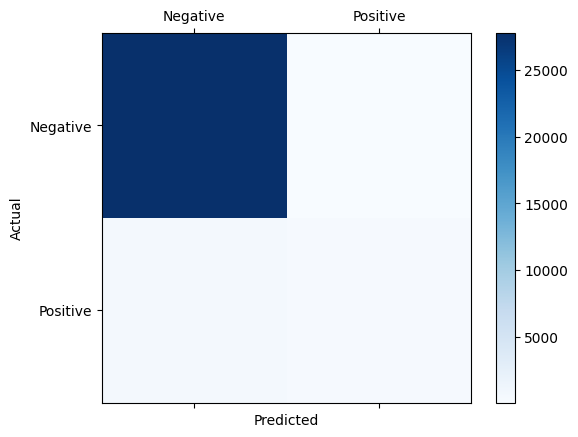

2026-02-07 15:40:18,671 | INFO | evaluation.evaluator | Plotando curva ROC


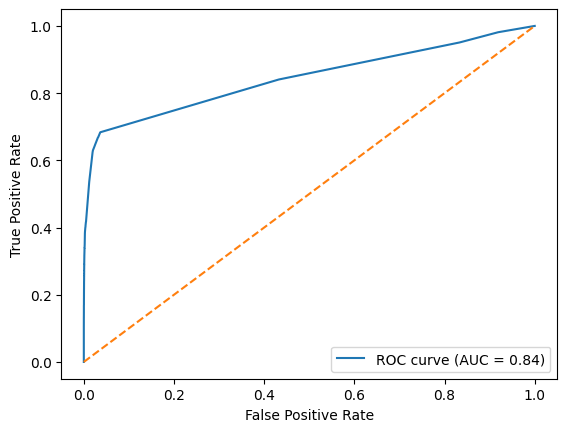

In [20]:
from pipeline.ml_pipeline import MLPipeline
from evaluation.evaluator import ModelEvaluator

# =========================
# Execução do pipeline
# =========================
pipeline = MLPipeline()

# Novo pipeline: retorna o ModelTrainer treinado
trainer = pipeline.run_with_trainer(df)

# =========================
# Avaliação do modelo
# =========================
evaluator = ModelEvaluator()

# Predições usando o estado interno do trainer
y_pred = trainer.model.predict(trainer.X_test)

# Métricas
metrics = evaluator.evaluate_metrics(
    y_true=trainer.y_test,
    y_pred=y_pred
)

# Classification report
report = evaluator.classification_report(
    y_true=trainer.y_test,
    y_pred=y_pred,
    target_names=["Negative", "Positive"]
)
print(report)

# Matriz de confusão
evaluator.plot_confusion_matrix(
    y_true=trainer.y_test,
    y_pred=y_pred,
    labels=["Negative", "Positive"]
)

# Curva ROC
evaluator.plot_roc_curve(
    model=trainer.model,
    X_test=trainer.X_test,
    y_true=trainer.y_test
)


In [21]:
from preprocessing.apply_random_undersampling import (
    apply_random_undersampling_from_trainer
)

X_balanced, y_balanced = apply_random_undersampling_from_trainer(trainer)


2026-02-07 15:40:19,370 | INFO | preprocessing.apply_random_undersampling | Iniciando RandomUnderSampler a partir do trainer
2026-02-07 15:40:19,409 | INFO | preprocessing.apply_random_undersampling | RandomUnderSampler aplicado | Tamanho antes: 114801 | depois: 6822


## Python imbalanced-learn module
A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

In [22]:
from preprocessing.apply_random_undersampling import (
    apply_random_undersampling_from_trainer
)

X_balanced, y_balanced = apply_random_undersampling_from_trainer(trainer)


2026-02-07 15:40:19,419 | INFO | preprocessing.apply_random_undersampling | Iniciando RandomUnderSampler a partir do trainer
2026-02-07 15:40:19,458 | INFO | preprocessing.apply_random_undersampling | RandomUnderSampler aplicado | Tamanho antes: 114801 | depois: 6822


2026-02-07 15:40:19,471 | INFO | training.trainer | Iniciando processo de treinamento
2026-02-07 15:40:19,473 | INFO | training.trainer | Entradas validadas com sucesso
2026-02-07 15:40:19,475 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 15:40:19,478 | INFO | training.trainer | Realizando split estratificado de treino e teste
2026-02-07 15:40:19,490 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 2729, 1: 2728})
2026-02-07 15:40:19,492 | INFO | training.trainer | Distribuição de classes no teste: Counter({1: 683, 0: 682})
2026-02-07 15:40:19,493 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 15:40:19,494 | INFO | training.trainer | Treinando modelo
2026-02-07 15:40:20,313 | INFO | training.trainer | Treinamento concluído com sucesso
2026-02-07 15:40:20,323 | INFO | evaluation.evaluator | Calculando métricas de avaliação
2026-02-07 15:40:20,336 | INFO | evaluation.evaluator | Accuracy: 84.

              precision    recall  f1-score   support

    Negative       0.77      0.97      0.86       682
    Positive       0.96      0.72      0.82       683

    accuracy                           0.84      1365
   macro avg       0.87      0.84      0.84      1365
weighted avg       0.87      0.84      0.84      1365



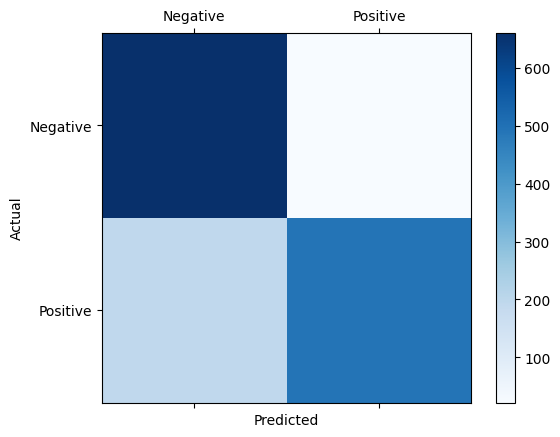

2026-02-07 15:40:20,577 | INFO | evaluation.evaluator | Plotando curva ROC


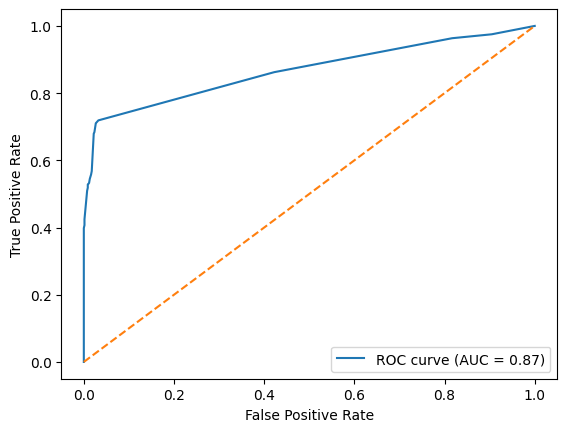

In [23]:
from training.trainer import ModelTrainer
from evaluation.evaluator import ModelEvaluator
from config.settings import ModelConfig
from utils.exceptions import MLProjectException

try:
    # ==================================================
    # 1️⃣ Novo treinamento com dados balanceados
    # ==================================================
    config = ModelConfig()

    balanced_trainer = ModelTrainer(config)
    balanced_trainer.train(
        X=X_balanced,
        y=y_balanced
    )

    # ==================================================
    # 2️⃣ Avaliação do modelo balanceado
    # ==================================================
    evaluator = ModelEvaluator()

    y_pred = balanced_trainer.model.predict(
        balanced_trainer.X_test
    )

    # Métricas
    metrics = evaluator.evaluate_metrics(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred
    )

    # Classification report
    report = evaluator.classification_report(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        target_names=["Negative", "Positive"]
    )
    print(report)

    # Matriz de confusão
    evaluator.plot_confusion_matrix(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        labels=["Negative", "Positive"]
    )

    # Curva ROC
    evaluator.plot_roc_curve(
        model=balanced_trainer.model,
        X_test=balanced_trainer.X_test,
        y_true=balanced_trainer.y_test
    )

except MLProjectException as error:
    print(f"Erro no pipeline com dados balanceados: {error}")


## Under-sampling: Cluster Centroids
This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

In [24]:
from preprocessing.apply_undersampling import apply_undersampling_from_trainer

X_balanced, y_balanced = apply_undersampling_from_trainer(trainer)

2026-02-07 15:40:20,795 | INFO | preprocessing.apply_undersampling | Iniciando under-sampling a partir do trainer
2026-02-07 15:40:20,796 | INFO | preprocessing.imbalance_handler | Aplicando ClusterCentroids under-sampling
C:\Users\User\Desktop\covid-19\data-science-machine-learning-for-covid-19-using-Python\.venv\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (85) found smaller than n_clusters (3411). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
2026-02-07 15:41:21,958 | INFO | preprocessing.imbalance_handler | Under-sampling concluído | Tamanho antes: 114801 | depois: 6822
2026-02-07 15:41:21,959 | INFO | preprocessing.apply_undersampling | Under-sampling aplicado com sucesso


2026-02-07 15:41:21,979 | INFO | training.trainer | Iniciando processo de treinamento
2026-02-07 15:41:21,981 | INFO | training.trainer | Entradas validadas com sucesso
2026-02-07 15:41:21,985 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 15:41:21,987 | INFO | training.trainer | Realizando split estratificado de treino e teste
2026-02-07 15:41:22,002 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 2729, 1: 2728})
2026-02-07 15:41:22,004 | INFO | training.trainer | Distribuição de classes no teste: Counter({1: 683, 0: 682})
2026-02-07 15:41:22,006 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 15:41:22,008 | INFO | training.trainer | Treinando modelo
2026-02-07 15:41:22,958 | INFO | training.trainer | Treinamento concluído com sucesso
2026-02-07 15:41:22,967 | INFO | evaluation.evaluator | Calculando métricas de avaliação
2026-02-07 15:41:22,983 | INFO | evaluation.evaluator | Accuracy: 92.

              precision    recall  f1-score   support

    Negative       0.87      0.99      0.93       682
    Positive       0.98      0.86      0.92       683

    accuracy                           0.92      1365
   macro avg       0.93      0.92      0.92      1365
weighted avg       0.93      0.92      0.92      1365



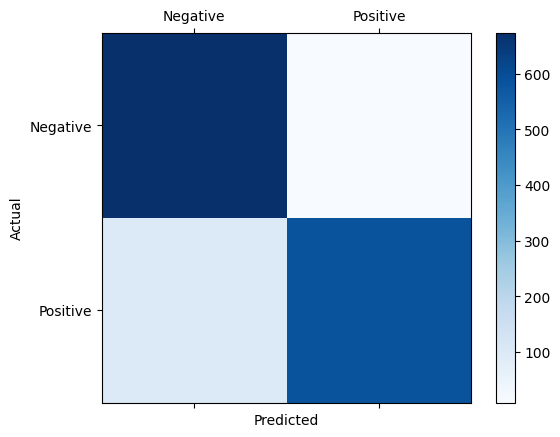

2026-02-07 15:41:23,213 | INFO | evaluation.evaluator | Plotando curva ROC


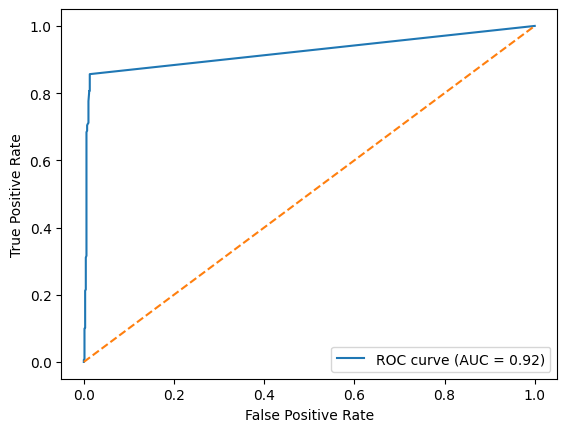

In [25]:
from training.trainer import ModelTrainer
from evaluation.evaluator import ModelEvaluator
from config.settings import ModelConfig
from utils.exceptions import MLProjectException

try:
    # ==================================================
    # 1️⃣ Novo treinamento com dados balanceados
    # ==================================================
    config = ModelConfig()

    balanced_trainer = ModelTrainer(config)
    balanced_trainer.train(
        X=X_balanced,
        y=y_balanced
    )

    # ==================================================
    # 2️⃣ Avaliação do modelo balanceado
    # ==================================================
    evaluator = ModelEvaluator()

    y_pred = balanced_trainer.model.predict(
        balanced_trainer.X_test
    )

    # Métricas
    metrics = evaluator.evaluate_metrics(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred
    )

    # Classification report
    report = evaluator.classification_report(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        target_names=["Negative", "Positive"]
    )
    print(report)

    # Matriz de confusão
    evaluator.plot_confusion_matrix(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        labels=["Negative", "Positive"]
    )

    # Curva ROC
    evaluator.plot_roc_curve(
        model=balanced_trainer.model,
        X_test=balanced_trainer.X_test,
        y_true=balanced_trainer.y_test
    )

except MLProjectException as error:
    print(f"Erro no pipeline com dados balanceados: {error}")


## Assigment: 

Try Oversampling Technique SMOTE, Compare and Contrast it with Undersampling Techniques and observe which one is better in our case
## Oversampling

**SMOTE (Synthetic Minority Oversampling TEchnique)** consists of synthesizing elements for the minority class, based on those that already exist. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [26]:
from preprocessing.apply_smote_oversampling import apply_smote_from_trainer

X_balanced, y_balanced = apply_smote_from_trainer(trainer)


2026-02-07 15:41:23,454 | INFO | preprocessing.apply_smote_oversampling | Iniciando over-sampling (smote) a partir do trainer
2026-02-07 15:41:23,727 | INFO | preprocessing.apply_smote_oversampling | SMOTE aplicado | Tamanho antes: 114801 | depois: 222780


2026-02-07 15:41:23,742 | INFO | training.trainer | Iniciando processo de treinamento
2026-02-07 15:41:23,744 | INFO | training.trainer | Entradas validadas com sucesso
2026-02-07 15:41:23,750 | INFO | training.trainer | Target validado | Classes encontradas: [0 1]
2026-02-07 15:41:23,752 | INFO | training.trainer | Realizando split estratificado de treino e teste
2026-02-07 15:41:23,943 | INFO | training.trainer | Distribuição de classes no treino: Counter({0: 89112, 1: 89112})
2026-02-07 15:41:23,956 | INFO | training.trainer | Distribuição de classes no teste: Counter({1: 22278, 0: 22278})
2026-02-07 15:41:23,957 | INFO | training.trainer | Inicializando GradientBoostingClassifier
2026-02-07 15:41:23,959 | INFO | training.trainer | Treinando modelo
2026-02-07 15:41:45,047 | INFO | training.trainer | Treinamento concluído com sucesso
2026-02-07 15:41:45,210 | INFO | evaluation.evaluator | Calculando métricas de avaliação
2026-02-07 15:41:45,243 | INFO | evaluation.evaluator | Accurac

              precision    recall  f1-score   support

    Negative       0.77      0.96      0.86     22278
    Positive       0.95      0.72      0.82     22278

    accuracy                           0.84     44556
   macro avg       0.86      0.84      0.84     44556
weighted avg       0.86      0.84      0.84     44556



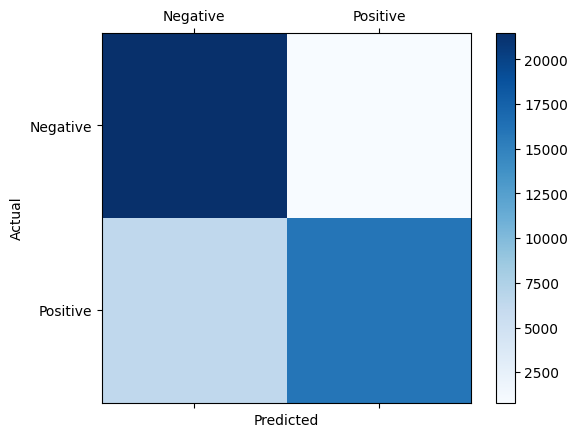

2026-02-07 15:41:45,520 | INFO | evaluation.evaluator | Plotando curva ROC


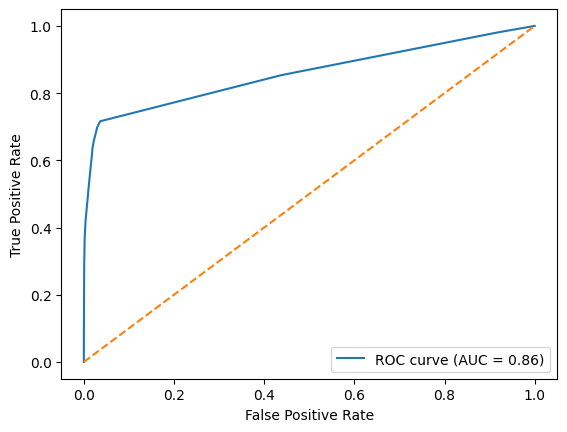

In [27]:
from training.trainer import ModelTrainer
from evaluation.evaluator import ModelEvaluator
from config.settings import ModelConfig
from utils.exceptions import MLProjectException

try:
    # ==================================================
    # 1️⃣ Novo treinamento com dados balanceados
    # ==================================================
    config = ModelConfig()

    balanced_trainer = ModelTrainer(config)
    balanced_trainer.train(
        X=X_balanced,
        y=y_balanced
    )

    # ==================================================
    # 2️⃣ Avaliação do modelo balanceado
    # ==================================================
    evaluator = ModelEvaluator()

    y_pred = balanced_trainer.model.predict(
        balanced_trainer.X_test
    )

    # Métricas
    metrics = evaluator.evaluate_metrics(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred
    )

    # Classification report
    report = evaluator.classification_report(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        target_names=["Negative", "Positive"]
    )
    print(report)

    # Matriz de confusão
    evaluator.plot_confusion_matrix(
        y_true=balanced_trainer.y_test,
        y_pred=y_pred,
        labels=["Negative", "Positive"]
    )

    # Curva ROC
    evaluator.plot_roc_curve(
        model=balanced_trainer.model,
        X_test=balanced_trainer.X_test,
        y_true=balanced_trainer.y_test
    )

except MLProjectException as error:
    print(f"Erro no pipeline com dados balanceados: {error}")


## Saving the Model




In [29]:
from persistence.model_persistence import save_model

save_model(
    model=trainer.model,
    filename="finalized_model_classifying_symptoms.sav"
)

2026-02-07 15:42:52,242 | INFO | persistence.model_persistence | Iniciando salvamento do modelo
2026-02-07 15:42:52,245 | INFO | persistence.model_persistence | Salvando modelo em: models\finalized_model_classifying_symptoms.sav
2026-02-07 15:42:52,261 | INFO | persistence.model_persistence | Modelo salvo com sucesso


WindowsPath('models/finalized_model_classifying_symptoms.sav')